In [4]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
import random

# Breakeven Bet: Expected Value and Simulation

From [CrossValidated Stackexchange][2] question: 

Here is the problem: 

 - A bet is known to have a win rate of 25%.
 - Upon winning, the bet pays $100.
 - Player can choose the cost of the bet. 

My understanding is that the breakeven bet size would be 25% times \$100 = $25, equal to the expected value of each bet. 

However, I simulated this game with a short Python script: 

[![100M trials of simple betting game][1]][1]

The simulation results in a profit, even after 100 million trials. It seems to always result in a profit, I've ran the simulation many times. It appears that ~$33 is closer to the actual breakeven bet size (not shown, I just manually adjusted the bet size higher until the resulting profit converged to about zero). 

What am I missing here? Am I calculating the breakeven bet size wrong or is there something wrong with the simulation? 

Thanks in advance!! 


  [1]: https://i.stack.imgur.com/MJsnd.png
  [2]: https://stats.stackexchange.com/posts/298813

# Simulation

In [185]:
# Simulation 
trials = 10**7
win_value = 100
lose_value = 25
win_qty = 0
total_value = 0


for k in range(trials):
    success = np.random.normal() > 0.67448975
    if success:
        total_value += win_value - lose_value
        win_qty += 1
    elif not success:
        total_value -= lose_value

print(win_qty / trials, 'win_rate')    
print(total_value, 'total_value')
print(total_value / trials, 'average_value')

0.2500813 win_rate
81300 total_value
0.00813 average_value


# Compare methods for generating randoms

Here is `np.random.normal`:

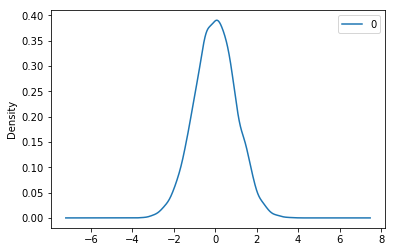

In [189]:
df = list()
for k in range(10000):
    df.append(np.random.normal())
df = pd.DataFrame(df)
df.plot(kind='density')
pyplot.show()
pyplot.close()

And here is `np.random.ranf`:

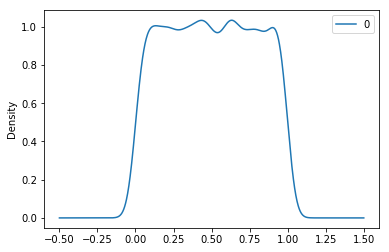

In [190]:
df = list()
for k in range(10000):
    df.append(np.random.ranf())
df = pd.DataFrame(df)
df.plot(kind='density')
pyplot.show()
pyplot.close()